Load data

Explanation of goal?

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Locate files for SETAC figures - for Gammarus

- C = Cuivre / Copper / Cu
- Z = Zinc / Zn
- M = Methomyl

In [2]:
#locate files
dataset = r'D:\VP\ARTICLE2\SETAC\Gammarus'
IGTfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]
meanfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]

IGTfiles

['D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG10.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG11.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG12.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG13.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG14.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG4.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG5.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG6.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG7.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG8.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG9.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\

Repeat for three species

In [30]:
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
etudes = {
    'C':{70:0,107:1,109:2,111:3,112:4,118:5,123:6,127:7,132:8,133:9,142:10,143:11,158:12,168:13,176:14},
    'M':{165:0,166:1,209:2,210:3},
    'Z':{121:0,122:1,125:2,130:3,131:4,155:5,159:6}
}

IGTs,means = {},{}

for s in [*specie]:
    dataset = r'D:\VP\ARTICLE2\SETAC\{}'.format(specie[s])
    IGTs.update({s:[r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]})
    means.update({s:[r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]})

means['G']

['D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG10.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG11.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG12.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG13.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG14.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG4.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG5.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG6.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG7.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG8.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG9.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_me

In [27]:
#syntax for IGT column entry
IGTs['G'][2].split('\\')[-1].split('.')[0][0]+IGTs['G'][2].split('\\')[-1].split('.')[0][6:]

'C10'

## Begin Gammarus plots

In [25]:
#Create dataframe for IGT values for 10 hour index
dfs_IGT,dfs_mean = {'E':None,'G':None,'R':None},{'E':None,'G':None,'R':None}
for species in [*specie]:
    IGTfiles,meanfiles = IGTs[species],means[species]
    df_IGT = pd.DataFrame(index = np.arange(10*60*3),columns = [IGTfiles[i].split('\\')[-1].split('.')[0][0]+IGTfiles[i].split('\\')[-1].split('.')[0][6:] for i in range(len(IGTfiles))])
    df_mean = pd.DataFrame(index = np.arange(10*60*3),columns = [meanfiles[i].split('\\')[-1].split('.')[0][0]+meanfiles[i].split('\\')[-1].split('.')[0][8:] for i in range(len(IGTfiles))])

    # datafile = pd.read_csv(IGTfiles[0],names = ['seconds','IGT'],index_col = 0).values

    #readdata for ten hours post dopage
    for i,col in enumerate(df_IGT.columns):
        IGTdata = pd.read_csv(IGTfiles[i],names = ['seconds','IGT'],index_col = 0)
        meandata = pd.read_csv(meanfiles[i],names = ['seconds','mean'],index_col = 0)
        df_IGT[col].iloc[:min(10*60*3,len(IGTdata))] = np.array(IGTdata.iloc[:min(10*60*3,len(IGTdata))]['IGT'])
        df_mean[col].iloc[:min(10*60*3,len(meandata))] = np.array(meandata.iloc[:min(10*60*3,len(meandata))]['mean'])
        
    dfs_IGT[species],dfs_mean[species] = df_IGT,df_mean

dfs_IGT['G'].head()

,C0,C1,C10,C11,C12,C13,C14,C2,C3,C4,...,M1,M2,M3,Z0,Z1,Z2,Z3,Z4,Z5,Z6
0,17.897553,0.0,0.0,8.626654,0.38788,0.0,0.370272,20.304787,0.0,0.0,...,32.225491,0.0,0.0,298.035913,0.0,0.0,0.0,0.0,0.0,0.0
1,27.589282,9.938256,12.072845,47.036508,34.72686,0.0,9.92565,167.396588,24.318706,0.0,...,105.698961,0.0,0.0,796.681673,0.0,0.0,0.0,1.113764,37.325176,0.0
2,221.613837,50.615399,30.454762,123.698513,67.771587,0.0,35.020554,881.679198,245.346799,47.54815,...,35.426899,0.0,0.0,1418.403647,0.0,0.0,0.0,30.869136,1120.30561,0.0
3,503.921683,175.969511,250.7145,235.552918,198.643655,0.053453,192.619702,2804.600957,408.266945,178.994519,...,5.196576,0.0,0.0,1879.0361,0.0,0.0,0.0,83.702371,2386.372979,0.0
4,847.723986,478.7344,449.577104,529.479275,294.711039,40.75801,351.050187,4850.618711,745.908018,451.701344,...,5.196576,0.0,0.0,2095.053098,0.0,0.0,0.0,108.15168,3261.218967,0.0


Select relevant Gammarus entries

In [42]:
#Begin with standard entries
g_entries = ['C{}'.format(etudes['C'][70]),'C{}'.format(etudes['C'][107]),'C{}'.format(etudes['C'][109]),'C{}'.format(etudes['C'][142]),'C{}'.format(etudes['C'][143]),
            'M{}'.format(etudes['M'][165]),'M{}'.format(etudes['M'][166]),'M{}'.format(etudes['M'][209]),'M{}'.format(etudes['M'][210]),
            'Z{}'.format(etudes['Z'][121]),'Z{}'.format(etudes['Z'][131]),'Z{}'.format(etudes['Z'][159])]

df_IGT,df_mean = dfs_IGT['G'][g_entries],dfs_mean['G'][g_entries]
df_IGT.head()

,C0,C1,C2,C10,C11,M0,M1,M2,M3,Z0,Z4,Z6
0,17.897553,0.0,20.304787,0.0,8.626654,1.198478,32.225491,0.0,0.0,298.035913,0.0,0.0
1,27.589282,9.938256,167.396588,12.072845,47.036508,1.198478,105.698961,0.0,0.0,796.681673,1.113764,0.0
2,221.613837,50.615399,881.679198,30.454762,123.698513,1.198478,35.426899,0.0,0.0,1418.403647,30.869136,0.0
3,503.921683,175.969511,2804.600957,250.7145,235.552918,11.812052,5.196576,0.0,0.0,1879.0361,83.702371,0.0
4,847.723986,478.7344,4850.618711,449.577104,529.479275,11.812052,5.196576,0.0,0.0,2095.053098,108.15168,0.0


Begin plot and registration

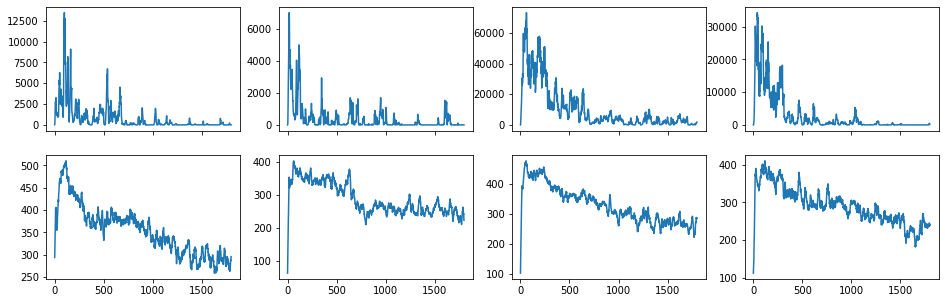

In [48]:
C_cols = [col for col in df_IGT.columns if col[0] == 'C']
M_cols = [col for col in df_IGT.columns if col[0] == 'M']
Z_cols = [col for col in df_IGT.columns if col[0] == 'Z']
fig_copp,ax_copp = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(C_cols[:-1]): 
    ax_copp[0,a].plot(df_IGT[i])
    ax_copp[1,a].plot(df_mean[i])

Zinc representation

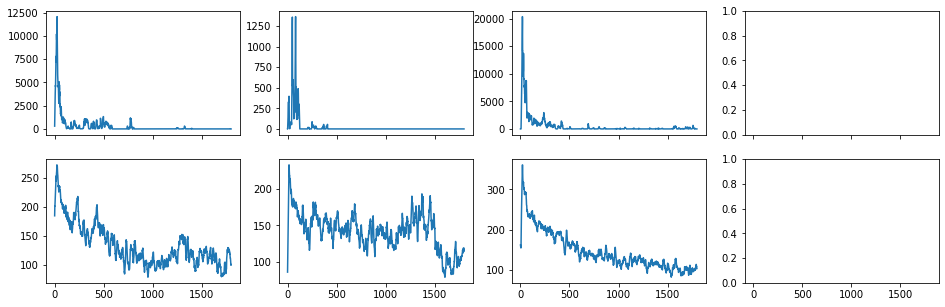

In [53]:
fig_zinc,ax_zinc = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(Z_cols): 
    ax_zinc[0,a].plot(df_IGT[i])
    ax_zinc[1,a].plot(df_mean[i])

Methomyl representation

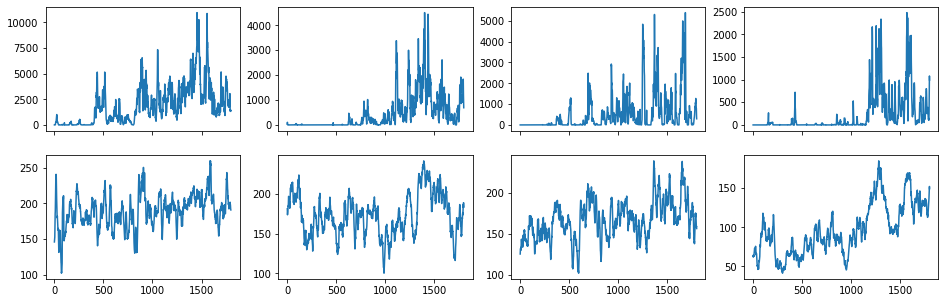

In [52]:
fig_meth,ax_meth = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(M_cols): 
    ax_meth[0,a].plot(df_IGT[i])
    ax_meth[1,a].plot(df_mean[i])

Gammarus data normalisation - from individual values what is the 95% non zero IGT and mean value?

Kernal Smoothing of all data

In [55]:
import skfda
from skfda.misc.hat_matrix import (
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.representation.grid import FDataGrid

In [57]:
#convert IGTs to fdatagrid
IGT_data_matrix = [np.around(np.array(df_IGT[col],dtype = np.float64),decimals = 3) for col in df_IGT.columns]
IGT_grid_points = [i for i in range(df_IGT.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTdata',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )
IGT_fd 

FDataGrid(
    array([[[1.789800e+01],
            [2.758900e+01],
            [2.216140e+02],
            ...,
            [5.000000e-03],
            [5.000000e-03],
            [5.000000e-03]],
    
           [[0.000000e+00],
            [9.938000e+00],
            [5.061500e+01],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[2.030500e+01],
            [1.673970e+02],
            [8.816790e+02],
            ...,
            [1.849614e+03],
            [1.849614e+03],
            [1.849614e+03]],
    
           ...,
    
           [[2.980360e+02],
            [7.966820e+02],
            [1.418404e+03],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[0.000000e+00],
            [1.114000e+00],
            [3.086900e+01],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[

In [58]:
means_data_matrix = [np.around(np.array(df_mean[col],dtype = np.float64),decimals = 3) for col in df_mean.columns]
means_grid_points = [i for i in range(df_mean.shape[0])]
means_fd = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

In [62]:
#FDA categories

y_map = {'C':0,'M':1,'Z':2}
y_IGT,y_mean = [y_map[c[0]] for c in df_IGT.columns],[y_map[c[0]] for c in df_mean.columns]
y_IGT

[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]

In [63]:
#IGT smoothing
IGT_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(IGT_fd)

#means smoothing
means_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd)

In [64]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
)

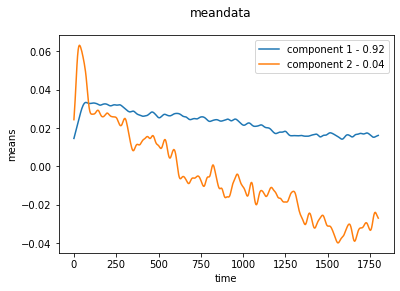

In [65]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

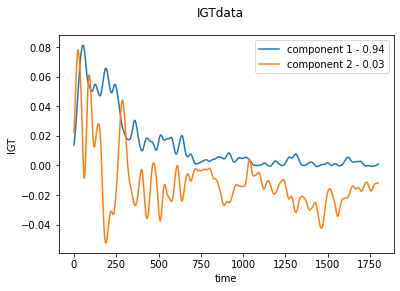

In [66]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(IGT_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

In [67]:
import seaborn as sns

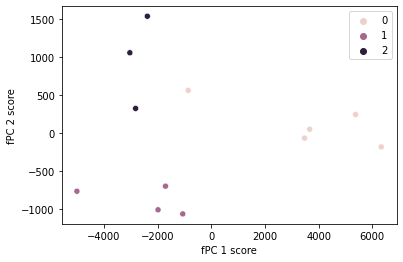

In [68]:
scores = fpca_discretized.fit_transform(means_fd_smooth)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()